# 回帰分析（OLSとベイズ統計）
---

## 1 OLSによる回帰分析
---
### 1.1 回帰モデル
$$
    \boldsymbol{y} = \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}　\\
    ここで、
        \boldsymbol{y} = \left( \begin{array}{c}
                       y_1 \\
                       \vdots \\
                       y_n
                     \end{array} \right), \ \ 
    \boldsymbol{X} = \left( \begin{array}{ccc}
                       x_{11} & \ldots & x_{1K} \\
                       \vdots & \ddots & \vdots \\
                       x_{n1} & \ldots & x_{nK}
                     \end{array} \right), \ \ 
    \boldsymbol{\beta} = \left( \begin{array}{c}
                       \beta_1 \\
                       \vdots \\
                       \beta_n
                     \end{array} \right), \ \ 
    \boldsymbol{\epsilon} = \left( \begin{array}{c}
                       \epsilon_1 \\
                       \vdots \\
                       \epsilon_n
                     \end{array} \right) \ \  
$$

### 1.2 最小二乗法（OLS)
$$
    \newcommand{\argmin}{\mathop{\rm arg~min}\limits}
    \begin{eqnarray}
      \boldsymbol{\hat{\beta}} &=& \argmin_\boldsymbol{\beta} \left\{ \left( \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \right)^\prime \left( \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \right) \right\} \\
                  &=& \argmin_\boldsymbol{\beta} \left\{ \left( \boldsymbol{y}^\prime - \left( \boldsymbol{X} \boldsymbol{\beta} \right)^\prime \right) \left( \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \right) \right\} \\
                                    &=& \argmin_\boldsymbol{\beta} \left\{ \left( \boldsymbol{y}^\prime - \boldsymbol{\beta}^\prime \boldsymbol{X}^\prime \right) \left( \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \right) \right\} \\
                                    &=& \argmin_\boldsymbol{\beta} \left( \boldsymbol{y}^\prime \boldsymbol{y} - \boldsymbol{y}^\prime \boldsymbol{X} \boldsymbol{\beta} - \boldsymbol{\beta}^\prime \boldsymbol{X}^\prime \boldsymbol{y} + \boldsymbol{\beta}^\prime \boldsymbol{X}^\prime \boldsymbol{X} \boldsymbol{\beta} \right) \\
                                    &=& \argmin_\boldsymbol{\beta} \left( \boldsymbol{y}^\prime \boldsymbol{y} - 2\boldsymbol{y}^\prime \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{\beta}^\prime \boldsymbol{X}^\prime \boldsymbol{X} \boldsymbol{\beta} \right) \\
                                    &=& \argmin_\boldsymbol{\beta} \left\{ \mathrm{Tr}\left( \boldsymbol{y}^\prime \boldsymbol{y} - 2\boldsymbol{y}^\prime \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{\beta}^\prime \boldsymbol{X}^\prime \boldsymbol{X} \boldsymbol{\beta} \right) \right\} \\
                                    &=& \argmin_\boldsymbol{\beta} \left\{ \mathrm{Tr} \left( \boldsymbol{y}^\prime \boldsymbol{y} \right) - \mathrm{Tr} \left( 2\boldsymbol{y}^\prime \boldsymbol{X} \boldsymbol{\beta} \right) + \mathrm{Tr} \left( \boldsymbol{\beta}^\prime \boldsymbol{X}^\prime \boldsymbol{X} \boldsymbol{\beta} \right) \right\} \\
                                    &=& \left[ \boldsymbol{\beta} \mid \frac{ d \left\{ \mathrm{Tr} \left( \boldsymbol{y}^\prime \boldsymbol{y} \right) - \mathrm{Tr} \left( 2\boldsymbol{y}^\prime \boldsymbol{X} \boldsymbol{\beta} \right) + \mathrm{Tr} \left( \boldsymbol{\beta}^\prime \boldsymbol{X}^\prime \boldsymbol{X} \boldsymbol{\beta} \right) \right\}}{d\boldsymbol{\beta}} = 0 \right] \\
                                    &=& \left( \boldsymbol{\beta} \mid -2 \boldsymbol{X}^\prime \boldsymbol{y} + 2 \boldsymbol{X}^\prime \boldsymbol{X} \boldsymbol{\beta} = 0 \right) \\
                                    &=& \left( \boldsymbol{\beta} \mid \boldsymbol{X}^\prime \boldsymbol{X} \boldsymbol{\beta} =  \boldsymbol{X}^\prime \boldsymbol{y} \right) \\
                                    &=& \left( \boldsymbol{X}^\prime \boldsymbol{X} \right)^{-1} \boldsymbol{X}^\prime \boldsymbol{y}
    \end{eqnarray}
$$

### 1.3 利用したテクニック
#### 1.3.1 Trace（行列の対角和）の定義
$$
\mathrm{Tr} \left( \boldsymbol{A} \right) = \mathrm{Tr} \left( \begin{array}{ccc}
                                           a_{11} & \ldots & a_{1N} \\
                                           \vdots & \ddots & \vdots \\
                                           a_{N1} & \ldots & a_{NN}
                                           \end{array} \right)
                           = \sum_{i=1}^N a_{ii}
$$

#### 1.3.2 Trace（行列の対角和）の公式
$$ \mathrm{Tr} \left( \boldsymbol{A+B} \right) = \mathrm{Tr} \left( \boldsymbol{A} \right) + \mathrm{Tr} \left( \boldsymbol{B} \right) $$

#### 1.3.3 行列の微分（Trace利用）
$$
\begin{eqnarray}
  \frac{d \ \mathrm{Tr} \left( \boldsymbol{AX} \right) }{d \boldsymbol{X}} &=& \boldsymbol{A^\prime},　\boldsymbol{X}が非対称の場合（ベクトルの場合を含む）\\
  \frac{d \ \mathrm{Tr} \left( \boldsymbol{X^\prime AX} \right) }{d \boldsymbol{X}} &=& \boldsymbol{\left(A+A^\prime\right)X},　\boldsymbol{X}が非対称の場合（ベクトルの場合を含む） \\
  &=& 2 \boldsymbol{AX},　\boldsymbol{A}が対称行列、\boldsymbol{X}が非対称の場合（ベクトルの場合を含む）
\end{eqnarray}
$$

### 1.4 データ分析
#### 1.4.1 ディレクトリ変更
* *UserDirectory*は、各自のディレクトリに変更が必要

In [1]:
cd "UserDirectory"

#### 1.4.2 データ読み込み
* ダイアモンドに関するデータ
    * [フロリダ州立大学](https://people.sc.fsu.edu/~jburkardt/datasets/triola/triola.html)よりダウンロード
* データセットの構成

|列1|列2|列3|列4|列5|列6
|-
|PRICE|CARAT|DEPTH|TABLE|COLOR|CLARITY

In [2]:
clear all;
data = csvread("diamonds.csv")(2:end,:);

#### 1.4.3 データ確認（散布図）
* scatter()関数は、なぜかjupyterではうまく動かないので、plot()関数を使用

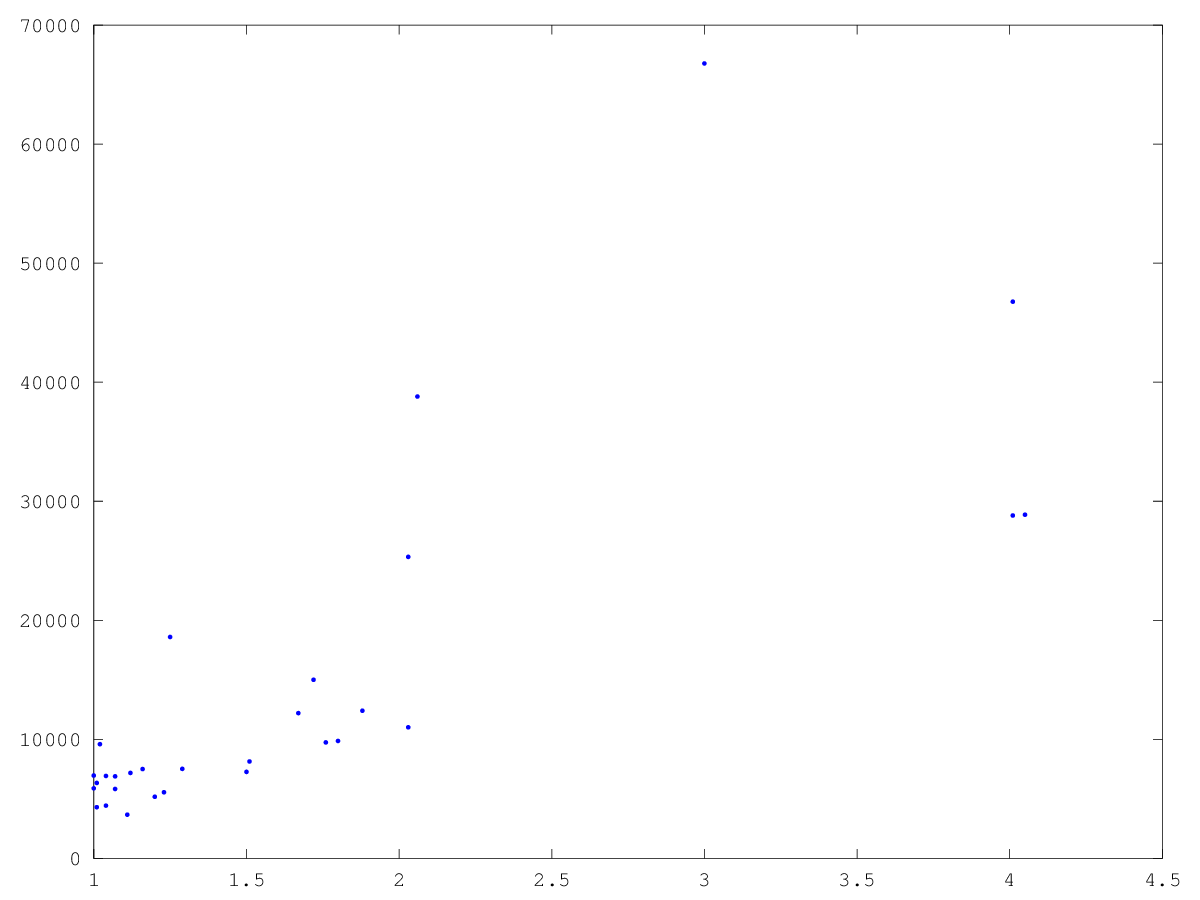

In [3]:
plot(data(:,2),data(:,1),".")

#### 1.4.4 回帰係数の計算

In [4]:
n = rows(data);

y = data(:,1);
X = [ones(n,1),data(:,2)];

b_hat = inv(X'*X)*X'*y

b_hat =
  -6.1576e+003
  1.2201e+004


#### 1.4.5 理論値の計算

In [5]:
yy = X*b_hat;
[y,yy]

ans =
  6.9580e+003  6.0429e+003
  5.8850e+003  6.0429e+003
  6.3330e+003  6.1649e+003
  4.2990e+003  6.1649e+003
  9.5890e+003  6.2869e+003
  6.9210e+003  6.5309e+003
  4.4260e+003  6.5309e+003
  6.8850e+003  6.8969e+003
  5.8260e+003  6.8969e+003
  3.6700e+003  7.3849e+003
  7.1760e+003  7.5069e+003
  7.4970e+003  7.9949e+003
  5.1700e+003  8.4830e+003
  5.5470e+003  8.8490e+003
  1.8596e+004  9.0930e+003
  7.5210e+003  9.5810e+003
  7.2600e+003  1.2143e+004
  8.1390e+003  1.2265e+004
  1.2196e+004  1.4217e+004
  1.4998e+004  1.4827e+004
  9.7360e+003  1.5315e+004
  9.8590e+003  1.5803e+004
  1.2398e+004  1.6779e+004
  2.5322e+004  1.8609e+004
  1.1008e+004  1.8609e+004
  3.8794e+004  1.8975e+004
  6.6780e+004  3.0444e+004
  4.6769e+004  4.2766e+004
  2.8800e+004  4.2766e+004
  2.8868e+004  4.3254e+004


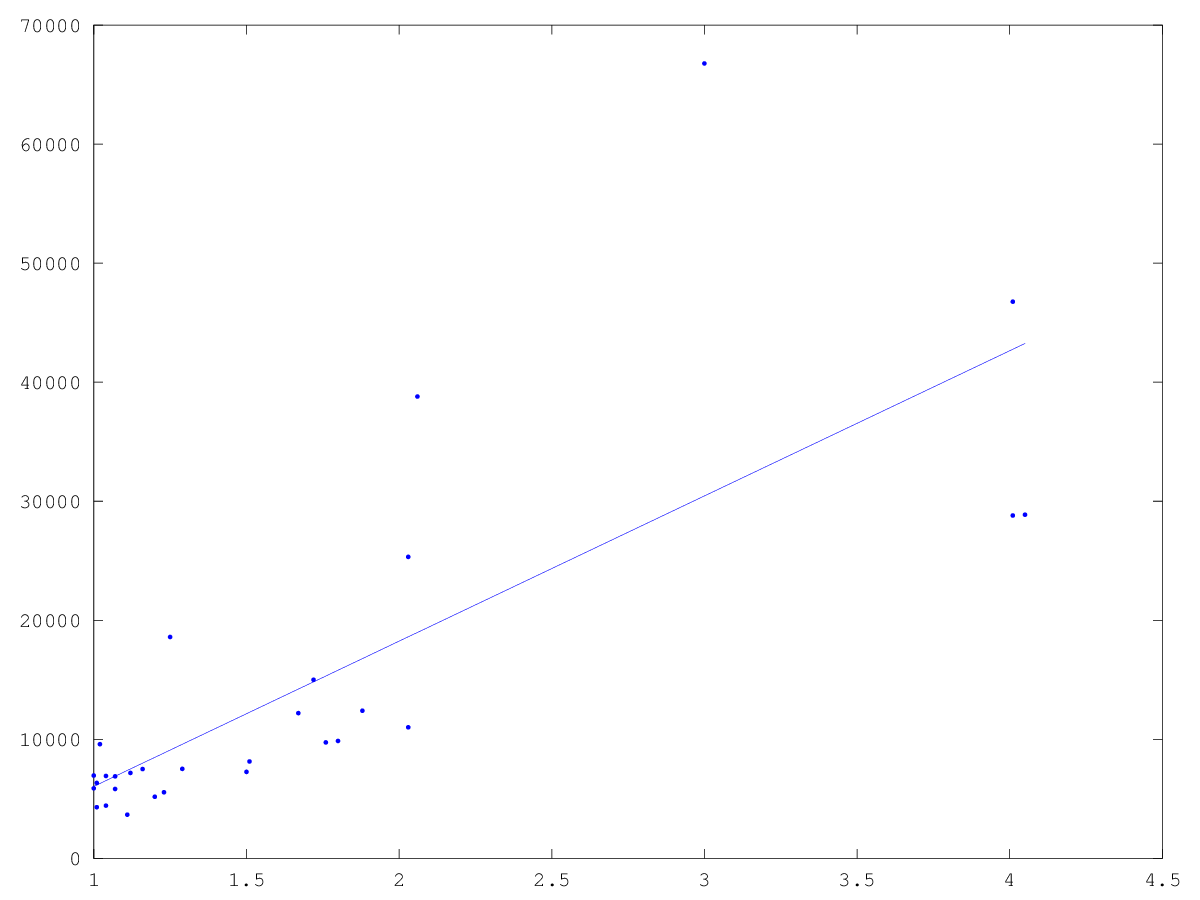

In [6]:
plot(X(:,2),yy)
hold on
plot(X(:,2),y,".")

## 2 ベイズ統計による回帰分析
---
### 2.1 回帰モデル
$$
    \boldsymbol{y} = \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}　\\
    ここで、
        \boldsymbol{y} = \left( \begin{array}{c}
                       y_1 \\
                       \vdots \\
                       y_n
                     \end{array} \right), \ \ 
    \boldsymbol{X} = \left( \begin{array}{ccc}
                       x_{11} & \ldots & x_{1K} \\
                       \vdots & \ddots & \vdots \\
                       x_{n1} & \ldots & x_{nK}
                     \end{array} \right), \ \ 
    \boldsymbol{\beta} = \left( \begin{array}{c}
                       \beta_1 \\
                       \vdots \\
                       \beta_n
                     \end{array} \right), \ \ 
    \boldsymbol{\epsilon} = \left( \begin{array}{c}
                       \epsilon_1 \\
                       \vdots \\
                       \epsilon_n
                     \end{array} \right) \ \  
$$

### 2.2 尤度関数
#### 2.2.1 誤差項の仮定
$$
\begin{eqnarray}
  \boldsymbol{\epsilon}|\sigma^2 &\sim& \mathcal {N}(\boldsymbol{0},\sigma^2 \boldsymbol{I_n}) \\
  \Rightarrow   \boldsymbol{y}|\boldsymbol{\beta},\sigma^2 &\sim& \mathcal {N}(\boldsymbol{X \beta},\sigma^2 \boldsymbol{I_n}) \\
\end{eqnarray}
$$
#### 2.2.2 尤度関数（＋変形）
$$
\begin{eqnarray}
  f \left( \boldsymbol{y} | \boldsymbol{\beta}, \sigma^2 \right) &=& \left(2\pi\right)^{-n/2} \left|\sigma^2 I_n\right|^{-1/2}
                                     \exp \left\{ -\frac{1}{2} \left( \boldsymbol{y}-\boldsymbol{X\beta} \right)^\prime \left( \sigma^2 \boldsymbol{I_n} \right) ^{-1} \left( \boldsymbol{y}-\boldsymbol{X\beta} \right) \right\} \\
                                     &\propto& \sigma^{-n} \exp \left\{ -\frac{\sigma^{-2}}{2} \left( \boldsymbol{y}- \boldsymbol{X\beta} \right)^\prime  \left( \boldsymbol{y}-\boldsymbol{X\beta} \right) \right\} \\
                                     &\propto& \sigma^{-n} \exp \left\{ -\frac{\sigma^{-2}}{2} \left( \boldsymbol{y^\prime}-\boldsymbol{\beta^\prime X^\prime} \right) \left( \boldsymbol{y}-\boldsymbol{X\beta} \right) \right\} \\
                                     &\propto& \sigma^{-n} \exp \left\{ -\frac{\sigma^{-2}}{2} \left( \boldsymbol{y^\prime y} - \boldsymbol{y^\prime X\beta} - \boldsymbol{\beta^\prime X^\prime y} + \boldsymbol{\beta^\prime X^\prime X\beta} \right) \right\} \\
                                     &\propto& \sigma^{-n} \exp \left[ -\frac{\sigma^{-2}}{2} \left\{ \boldsymbol{y^\prime y} - \boldsymbol{y^\prime X \left(X^\prime X\right)^{-1}\left(X^\prime X\right) \beta} - \boldsymbol{\beta^\prime \left(X^\prime X\right) \left(X^\prime X\right)^{-1} X^\prime y} + \boldsymbol{\beta^\prime X^\prime X\beta} \right\} \right] \\
                                     &\propto& \sigma^{-n} \exp \left[ -\frac{\sigma^{-2}}{2} \left\{ \boldsymbol{y^\prime y} - \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \beta} - \boldsymbol{\beta^\prime \left(X^\prime X\right) \hat{\beta}} + \boldsymbol{\beta^\prime X^\prime X\beta} \right\} \right] \\
                                     &\propto& \sigma^{-n} \exp \left[ -\frac{\sigma^{-2}}{2} 
                                      \left\{ \boldsymbol{\beta^\prime X^\prime X \left( \beta - \hat{\beta} \right) } - \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \beta}  + \boldsymbol{y^\prime y}  \right\} \right] \\
                                     &\propto& \sigma^{-n} \exp \left[ -\frac{\sigma^{-2}}{2} 
                                      \left\{ \boldsymbol{\beta^\prime X^\prime X \left( \beta - \hat{\beta} \right) } - \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \beta} + \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \hat{\beta}} - \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \hat{\beta}} + \boldsymbol{y^\prime y}  \right\} \right] \\
                                     &\propto& \sigma^{-n} \exp \left[ -\frac{\sigma^{-2}}{2} 
                                      \left\{ \boldsymbol{\beta^\prime X^\prime X \left( \beta - \hat{\beta} \right) } - \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \left( \beta - \hat{\beta} \right)} - \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \hat{\beta}} + \boldsymbol{y^\prime y}  \right\} \right] \\
                                     &\propto& \sigma^{-n} \exp \left[ -\frac{\sigma^{-2}}{2} 
                                      \left\{ \boldsymbol{ \left(\beta^\prime - \hat{\beta}^\prime \right) X^\prime X \left( \beta - \hat{\beta} \right) } - \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \hat{\beta}} + \boldsymbol{y^\prime y}  \right\} \right] \\
                                     &\propto& \sigma^{-n} \exp \left[ -\frac{\sigma^{-2}}{2} 
                                      \left\{ \boldsymbol{ \left(\beta - \hat{\beta}\right)^\prime X^\prime X \left( \beta - \hat{\beta} \right) } -2 \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \hat{\beta}} + \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \hat{\beta}} + \boldsymbol{y^\prime y}  \right\} \right] \\
                                     &\propto& \sigma^{-n} \exp \left[ -\frac{\sigma^{-2}}{2} 
                                      \left\{ \boldsymbol{ \left(\beta - \hat{\beta}\right)^\prime X^\prime X \left( \beta - \hat{\beta} \right) } - \boldsymbol{\hat{\beta}^\prime X^\prime y} - \boldsymbol{y^\prime X \hat{\beta}} + \boldsymbol{\hat{\beta}^\prime \left(X^\prime X\right) \hat{\beta}} + \boldsymbol{y^\prime y}  \right\} \right] \\
                                     &\propto& \sigma^{-n} \exp \left[ -\frac{\sigma^{-2}}{2} 
                                      \left\{ \boldsymbol{ \left(\beta - \hat{\beta}\right)^\prime X^\prime X \left( \beta - \hat{\beta} \right) } + \boldsymbol{ \left(y-X\hat{\beta}\right)^\prime \left(y-X\hat{\beta}\right) }  \right\} \right] \\
\end{eqnarray}
$$

### 2.3 事前分布
#### 2.3.1 各パラメータの事前分布
$$
\begin{eqnarray}
  \beta \mid \sigma^2 &\sim& \mathcal{N} \left(\boldsymbol{b_0},\sigma^2 \boldsymbol{B_0} \right),\\
  \sigma^2 &\sim& \mathcal{IG} \left(\frac{n_0}{2},\frac{n_0 S_0}{2} \right)
\end{eqnarray}
$$
#### 2.3.2 同時事前分布
$$
\begin{eqnarray}
 \pi \left( \beta,\sigma^2 \right) &=& \pi \left( \beta | \sigma^2 \right) \pi \left(\sigma^2 \right) \\
                                 &=& \left(2\pi\right)^{-K/2} \left|\sigma^2 B_0\right|^{-1/2}
                                     \exp \left\{ -\frac{1}{2} \left( \beta-b_0 \right)^\prime \left( \sigma^2 B_0 \right)^{-1} \left( \beta-b_0 \right) \right\} \\
                                 & & \times \frac{\left(\frac{n_0S_0}{2}\right)^{\frac{n_0}{2}}}{\Gamma \left( \frac{n_0}{2} \right)} \sigma^{-2 \left( \frac{n_0}{2}+1 \right) } \exp \left\{ - \frac{n_0S_0}{2} \sigma^{-2} \right\} \\
                                 & \propto & \left|\sigma^2 B_0\right|^{-1/2}
                                     \exp \left\{ -\frac{1}{2} \left( \beta-b_0 \right)^\prime \left( \sigma^2 B_0 \right)^{-1} \left( \beta-b_0 \right) \right\} \\
                                     & & \times \sigma^{ -2 \left( \frac{n_0}{2}+1 \right) } \exp \left\{ - \frac{n_0S_0}{2} \sigma^{-2} \right\} \\
                                     & \propto & \sigma^{-K} \sigma^{-2 \left( \frac{n_0}{2}+1 \right) } 
                                     \exp \left\{ -\frac{1}{2} \left( \beta-b_0 \right)^\prime \left( \sigma^2 B_0 \right) ^{-1} \left( \beta-b_0 \right) - \frac{n_0S_0}{2} \sigma^{-2} \right\} \\
                                     & \propto & \sigma^{-2 \left[ \left(n_0 + K \right) /2 + 1 \right]}
                                     \exp \left[ -\frac{\sigma^{-2}}{2} \left\{ n_0S_0 + \left( \beta-b_0 \right)^\prime B_0^{-1} \left( \beta-b_0 \right) \right\} \right]
\end{eqnarray}
$$

### 2.4 事後分布
#### 2.4.1 同時事後分布
$$
\begin{eqnarray}
  \pi \left( \beta,\sigma^2 \mid y \right) &\propto& f\left(y \mid \beta,\sigma^2 \right) \pi \left(\beta,\sigma^2\right) \\
  &\propto& \sigma^{-n} \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \left(\beta - \hat{\beta}\right)^\prime X^\prime X \left( \beta - \hat{\beta} \right) } + \boldsymbol{ \left(y-X\hat{\beta}\right)^\prime \left(y-X\hat{\beta}\right) }  \right\} \right] \\
  & &  \times \sigma^{-2 \left[ \left(n_0 + K \right) /2 + 1 \right]}
    \exp \left[ -\frac{\sigma^{-2}}{2} \left\{ n_0S_0 + \left( \beta-b_0 \right)^\prime B_0^{-1} \left( \beta-b_0 \right) \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \left(\beta - \hat{\beta}\right)^\prime X^\prime X \left( \beta - \hat{\beta} \right) } + \boldsymbol{ \left(y-X\hat{\beta}\right)^\prime \left(y-X\hat{\beta}\right) }  \\
  + n_0S_0 + \left( \beta-b_0 \right)^\prime B_0^{-1} \left( \beta-b_0 \right) \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \beta^\prime X^\prime X \beta - \beta^\prime X^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime X \beta + \hat{\beta}^\prime X^\prime X \hat{\beta} } \\
  + \boldsymbol{ y^\prime y - y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime X^\prime X\hat{\beta} }  \\
  + n_0S_0 + \beta^\prime B_0^{-1} \beta - \beta^\prime B_0^{-1} b_0 - b_0^\prime B_0^{-1} \beta + b_0^\prime B_0^{-1} b_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \beta^\prime \left( X^\prime X + B_0^{-1} \right) \beta - \beta^\prime \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \beta \\
    + \hat{\beta}^\prime X^\prime X \hat{\beta} } + \boldsymbol{ y^\prime y - y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime X^\prime X\hat{\beta} } + n_0S_0 + b_0^\prime B_0^{-1} b_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \beta^\prime \left( X^\prime X + B_0^{-1} \right) \beta - \beta^\prime \left( X^\prime X + B_0^{-1} \right) \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \\
    - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \beta \\
    + \hat{\beta}^\prime X^\prime X \hat{\beta} } + \boldsymbol{ y^\prime y - y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime X^\prime X\hat{\beta} } + n_0S_0 + b_0^\prime B_0^{-1} b_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \beta^\prime \left( X^\prime X + B_0^{-1} \right) \left\{ \beta - \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \right\} \\
    - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \beta \\
    + \hat{\beta}^\prime X^\prime X \hat{\beta} } + \boldsymbol{ y^\prime y - y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime X^\prime X\hat{\beta} } + n_0S_0 + b_0^\prime B_0^{-1} b_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \beta^\prime \left( X^\prime X + B_0^{-1} \right) \left\{ \beta - \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \right\} \\
    - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X + B_0^{-1} \right) \left\{ \beta - \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \right\} \\
    - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \\
    + \hat{\beta}^\prime X^\prime X \hat{\beta} } + \boldsymbol{ y^\prime y - y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime X^\prime X\hat{\beta} } + n_0S_0 + b_0^\prime B_0^{-1} b_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} \left\{\\
     \boldsymbol{ \left\{\beta^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \left( X^\prime X + B_0^{-1} \right)^{-1} \right\} \left( X^\prime X + B_0^{-1} \right) \left\{ \beta - \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \right\} \\
    - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \\
    + \hat{\beta}^\prime X^\prime X \hat{\beta} } + \boldsymbol{ y^\prime y - y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime X^\prime X\hat{\beta} } + n_0S_0 + b_0^\prime B_0^{-1} b_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} \left\{\\
     \boldsymbol{ \left\{\beta^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \left( X^\prime X + B_0^{-1} \right)^{-1} \right\} \left( X^\prime X + B_0^{-1} \right) \left\{ \beta - \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \right\} \\
    - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1}X^\prime X\hat{\beta} + y^\prime y \\
    - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} B_0^{-1} b_0 + b_0^\prime B_0^{-1} b_0 \\
    + \hat{\beta}^\prime X^\prime X \hat{\beta} } \boldsymbol{-y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime X^\prime X\hat{\beta} } + n_0S_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} \left\{\\
     \boldsymbol{ \left\{\beta^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \left( X^\prime X + B_0^{-1} \right)^{-1} \right\} \left( X^\prime X + B_0^{-1} \right) \left\{ \beta - \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \right\} \\
    - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1}X^\prime X \left( X^\prime X \right)^{-1} X^\prime y + y^\prime y \\
    - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} B_0^{-1} b_0 + b_0^\prime B_0^{-1} b_0 \\
    + \hat{\beta}^\prime X^\prime X \hat{\beta} } \boldsymbol{-y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime X^\prime X\hat{\beta} } + n_0S_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} \left\{\\
     \boldsymbol{ \left\{\beta^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \left( X^\prime X + B_0^{-1} \right)^{-1} \right\} \left( X^\prime X + B_0^{-1} \right) \left\{ \beta - \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \right\} \\
    + \left\{ y^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} X^\prime \right\} y \\
    + \left\{ b_0^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} \right\} B_0^{-1} b_0 \\
    + \hat{\beta}^\prime X^\prime X \hat{\beta} } \boldsymbol{-y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime X^\prime X\hat{\beta} } + n_0S_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} \left\{\\
     \boldsymbol{ \left\{\beta^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \left( X^\prime X + B_0^{-1} \right)^{-1} \right\} \left( X^\prime X + B_0^{-1} \right) \left\{ \beta - \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \right\} \\
    + \left\{ y^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} X^\prime \right\} y \\
    + \left\{ b_0^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} \right\} B_0^{-1} b_0 \\
    + y^\prime X \left(X^\prime X \right)^{-1} X^\prime X \hat{\beta} } \boldsymbol{-y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime X^\prime X \left(X^\prime X \right)^{-1} X^\prime y } + n_0S_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} \left\{\\
    \boldsymbol{ \left\{\beta^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \left( X^\prime X + B_0^{-1} \right)^{-1} \right\} \left( X^\prime X + B_0^{-1} \right) \left\{ \beta - \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \right\} \\
    + \left\{ y^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} X^\prime \right\} y \\
    + \left\{ b_0^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} \right\} B_0^{-1} b_0 } \\
    + \boldsymbol{ y^\prime X \hat{\beta} - y^\prime X\hat{\beta} - \hat{\beta}^\prime X^\prime y + \hat{\beta}^\prime  X^\prime y } + n_0S_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_0 + n + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} \left\{\\
    \boldsymbol{ \left\{\beta^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right) \left( X^\prime X + B_0^{-1} \right)^{-1} \right\} \left( X^\prime X + B_0^{-1} \right) \left\{ \beta - \left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right) \right\} \\
    + \left\{ y^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} X^\prime \right\} y \\
    + \left\{ b_0^\prime - \left( \hat{\beta}^\prime X^\prime X + b_0^\prime B_0^{-1} \right)\left( X^\prime X + B_0^{-1} \right)^{-1} \right\} B_0^{-1} b_0 }\\
    + n_0S_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_1 + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \left( \beta^\prime - b_1^\prime \right) B_1^{-1} \left( \beta - b_1 \right) + \left( y^\prime - b_1^\prime X^\prime \right) y + \left( b_0^\prime - b_1^\prime \right) B_0^{-1} b_0 } + n_0S_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_1 + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \left( \beta - b_1 \right)^\prime B_1^{-1} \left( \beta - b_1 \right) + \left( y - X b_1 \right)^\prime y + \left( b_0 - b_1 \right)^\prime B_0^{-1} b_0 } + n_0S_0  \right\} \right] \\
  &\propto& \sigma^{-2 \left[ \left(n_1 + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \left( \beta - b_1 \right)^\prime B_1^{-1} \left( \beta - b_1 \right) } + n_1S_1  \right\} \right] \\
\end{eqnarray}
$$

　　　ここで、
$$
\begin{eqnarray}
  \boldsymbol{b_1} &=& \boldsymbol{\left( X^\prime X + B_0^{-1} \right)^{-1} \left( X^\prime X\hat{\beta} + B_0^{-1} b_0 \right)},  \\
  \boldsymbol{B_1^{-1}} &=& \boldsymbol{\left( X^\prime X + B_0^{-1} \right)}, \\
  n_1 &=& n_0 +n, \\
  n_1 S_1  &=& n_0S_0 + \boldsymbol{\left( y - X b_1 \right)^\prime y + \left( b_0 - b_1 \right)^\prime B_0^{-1} b_0} 
\end{eqnarray}
$$

#### 2.4.2 周辺事後分布
##### 2.4.2.1 分散（$\sigma^2$）
$$
\begin{eqnarray}
  \pi \left( \sigma^2 \mid y \right) &=& \int_{-\infty}^\infty \pi \left( \beta,\sigma^2 \mid y \right) d\beta \\
  &\propto& \int_{-\infty}^\infty \sigma^{-2 \left[ \left(n_1 + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \left( \beta - b_1 \right)^\prime B_1^{-1} \left( \beta - b_1 \right) } + n_1S_1  \right\} \right] d\beta \\
  &\propto& \sigma^{-2 \left( n_1 /2 + 1 \right)} \exp \left[ -\frac{\sigma^{-2}}{2} n_1S_1 \right] \\
  & & \times  \left(\sigma^2\right)^{-K/2}  
    \int_{-\infty}^\infty  
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \left( \beta - b_1 \right)^\prime B_1^{-1} \left( \beta - b_1 \right) } \right\} \right] d\beta \\
  &\propto& \sigma^{-2 \left( n_1 /2 + 1 \right)} \exp \left[ -\frac{\sigma^{-2}}{2} n_1S_1 \right] \\
  & & \times \left( 2\pi \right)^{K/2}
    \underbrace{ \left( 2\pi \right)^{-K/2} \left(\sigma^2\right)^{-K/2}  
                 \int_{-\infty}^\infty  
                 \exp \left[ -\frac{\sigma^{-2}}{2} 
                 \left\{ \boldsymbol{ \left( \beta - b_1 \right)^\prime B_1^{-1} \left( \beta - b_1 \right) } \right\} \right] d\beta }_{1（∵多変量正規分布の密度関数の積分）} \\
  &\propto& \left( 2\pi \right)^{K/2} \sigma^{-2 \left( n_1 /2 + 1 \right)} \exp \left[ -\frac{\sigma^{-2}}{2} n_1S_1  \right] \\
  &\propto& \left(\sigma^2\right)^{-\left( n_1 /2 + 1 \right)} \exp \left[ -\frac{n_1S_1}{2} \sigma^{-2}  \right] \\
  \Leftrightarrow \sigma^2 \mid y &\sim& \mathcal{IG} \left( \frac{n_1}{2}, \frac{n_1S_1}{2} \right)
\end{eqnarray}
$$

##### 2.4.2.2 回帰係数（$\beta$）
$$
\begin{eqnarray}
  \pi \left( \beta \mid y \right) &=& \int_{0}^\infty \pi \left( \beta,\sigma^2 \mid y \right) d\sigma^2 \\
    &\propto& \int_{0}^\infty \sigma^{-2 \left[ \left(n_1 + K \right) /2 + 1 \right]} 
    \exp \left[ -\frac{\sigma^{-2}}{2} 
    \left\{ \boldsymbol{ \left( \beta - b_1 \right)^\prime B_1^{-1} \left( \beta - b_1 \right) } + n_1S_1  \right\} \right] d\sigma^2 \\
    &\propto& \frac{\left(\frac{\left(\beta-b_1\right)^\prime B_1^{-1} \left(\beta-b_1\right) + n_1S_1}{2}\right)^{-(n_1+K)/2}}{\Gamma \left(\frac{n_1+K}{2}\right)^{-1}} \\
    & & \times
     \underbrace{
       \frac{\left(\frac{\left(\beta-b_1\right)^\prime B_1^{-1} \left(\beta-b_1\right) + n_1S_1}{2}\right)^{(n_1+K)/2}}{\Gamma \left(\frac{n_1+K}{2}\right)}
       \int_{0}^\infty \sigma^{-2 \left[ \left(n_1 + K \right) /2 + 1 \right]} 
       \exp \left[ -\frac{\sigma^{-2}}{2} 
       \left\{ \boldsymbol{ \left( \beta - b_1 \right)^\prime B_1^{-1} \left( \beta - b_1 \right) } + n_1S_1  \right\} \right] d\sigma^2
     }_{1（∵逆ガンマ分布の密度関数の積分）}\\
    &\propto& \frac{\left(\frac{\left(\beta-b_1\right)^\prime B_1^{-1} \left(\beta-b_1\right) + n_1S_1}{2}\right)^{-(n_1+K)/2}}{\Gamma \left(\frac{n_1+K}{2}\right)^{-1}} \\
    &\propto& \left(\frac{\left(\beta-b_1\right)^\prime B_1^{-1} \left(\beta-b_1\right) + n_1S_1}{2}\right)^{-(n_1+K)/2} \\
    &\propto& \left( \frac{n_1S_1}{2}\right)^{-(n_1+K)/2}
     \left( 1+ \frac{\left(\beta-b_1\right)^\prime B_1^{-1} \left(\beta-b_1\right)}{n_1S_1}\right)^{-(n_1+K)/2} \\
    &\propto& \left( 1+ \frac{\left(\beta-b_1\right)^\prime B_1^{-1} \left(\beta-b_1\right)}{n_1S_1}\right)^{-(n_1+K)/2} \\
  \Leftrightarrow \beta \mid y &\sim& \mathcal{T_{n_1}} \left(b_1,S_1B_1\right)
\end{eqnarray}
$$ 

### 2.5 データ分析
#### 2.5.1 事前分布の設定
##### 2.5.1.1 回帰係数（$\beta$）

In [7]:
K = columns(X);
b0 = zeros(K,1);
B0 = 1000*eye(K);

##### 2.5.1.2 分散（$\sigma^2$）

In [8]:
n0 = 0.002;
n0S0 = 0.002;

#### 2.5.2 周辺事後分布の計算
##### 2.5.2.1 準備

In [9]:
B1 = inv(X'*X + inv(B0));
b1 = B1 * (X'*X*b_hat + inv(B0)*b0);
n1 = n0 + n;
n1S1 = n0S0 + (y-X*b1)'*y + (b0-b1)'*inv(B0)*b0;
S1 = n1S1/n1;

##### 2.5.2.2 回帰係数（$\beta$）
* 2.5.2.2.1 平均値（$b_1$）
    * （参考）OLSの推計値（$\hat{\beta}$）

In [10]:
b1
b_hat

b1 =
  -6.1559e+003
  1.2200e+004
b_hat =
  -6.1576e+003
  1.2201e+004


* 2.5.2.2.2 平均値周辺の分布

In [11]:
beta_domain = linspace(b1-abs(b1/100),b1+abs(b1/100),5);
beta_post_dens = zeros(5,5);

for i = 1:5
    for j = 1:5
        beta = [beta_domain(1,i);beta_domain(2,j)];
        beta_post_dens(i,j) = (1 + (beta-b1)'*inv(B1)*(beta-b1)/n1S1) ^ (-(n1+K)/2);
        beta_post_dens(i,j) = beta_post_dens(i,j) * gamma((n1+K)/2) / gamma(n1/2);
        beta_post_dens(i,j) = beta_post_dens(i,j) * (pi*n1)^(-K/2) * det(S1*B1)^(-1/2);
    endfor
endfor

beta_post_dens_bhat = (1 + (b_hat-b1)'*inv(B1)*(b_hat-b1)/n1S1) ^ (-(n1+K)/2);
beta_post_dens_bhat = beta_post_dens_bhat * gamma((n1+K)/2) / gamma(n1/2);
beta_post_dens_bhat = beta_post_dens_bhat * (pi*n1)^(-K/2) * det(S1*B1)^(-1/2);

beta_post_dens_b1 = (1 + (b1-b1)'*inv(B1)*(b1-b1)/n1S1) ^ (-(n1+K)/2);
beta_post_dens_b1 = beta_post_dens_b1 * gamma((n1+K)/2) / gamma(n1/2);
beta_post_dens_b1 = beta_post_dens_b1 * (pi*n1)^(-K/2) * det(S1*B1)^(-1/2);

beta_post_dens
beta_post_dens_bhat
beta_post_dens_b1

beta_post_dens =
  5.0354e-008  5.0870e-008  5.1126e-008  5.1117e-008  5.0843e-008
  5.0503e-008  5.0960e-008  5.1154e-008  5.1083e-008  5.0748e-008
  5.0635e-008  5.1030e-008  5.1163e-008  5.1030e-008  5.0635e-008
  5.0748e-008  5.1083e-008  5.1154e-008  5.0960e-008  5.0503e-008
  5.0843e-008  5.1117e-008  5.1126e-008  5.0870e-008  5.0354e-008
beta_post_dens_bhat =   5.1163e-008
beta_post_dens_b1 =   5.1163e-008


##### 2.5.2.3 分散（$\sigma^2$）
* 平均値

In [12]:
sigma2_mean = (n1S1/2)/(n1/2-1)

sigma2_mean =   8.9865e+007


* 分散

In [13]:
sigma2_var = (n1S1/2)^2/((n1/2-1)^2)/(n1/2-2)

sigma2_var =   6.2116e+014


* 分布

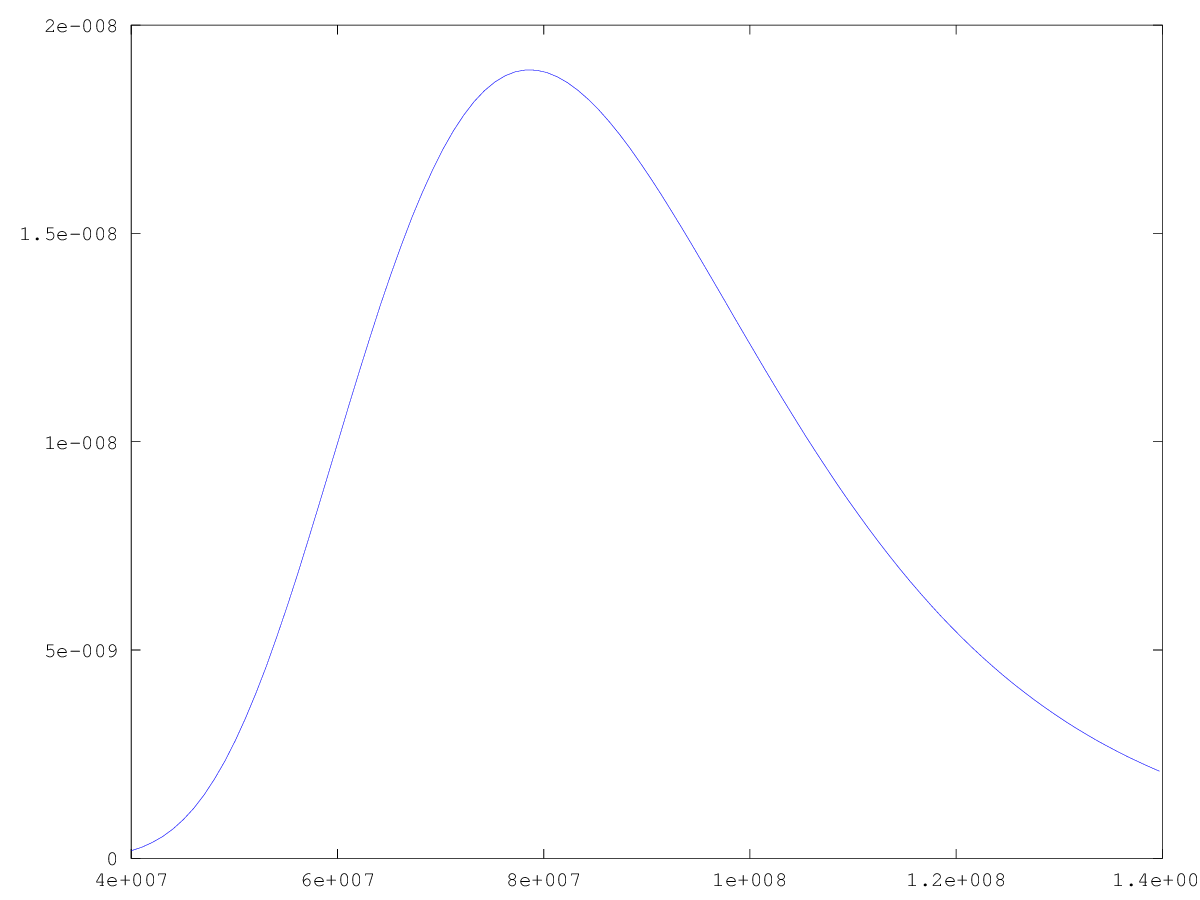

In [14]:
sigma2_domain = linspace(sigma2_mean-2*(sigma2_var)^(1/2),sigma2_mean+2*(sigma2_var)^(1/2),100);
sigma2_post_dens = zeros(100,1);

for i = 1:100
        sigma2_post_dens(i) = exp(-(n1S1/2)*sigma2_domain(i)^(-1));
        sigma2_post_dens(i) = sigma2_post_dens(i) * sigma2_domain(i)^(-(n1/2+1));
        sigma2_post_dens(i) = sigma2_post_dens(i) * (n1S1/2)^(n1/2)/gamma(n1/2);
endfor

plot(sigma2_domain,sigma2_post_dens)